In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Parámetros:

$ a = \frac{w_t}{w_l} $

Siendo $w_t$ la velocidad angular de la tierra respecto al sol y siendo $w_l$ la velocidad angular de la luna respecto a la tierra

$w_t = \frac{2\pi}{P_t}$
$w_l = \frac{2\pi}{P_l}$

$P_l$ = 27.4 días (tiempo que tarda en dar una vuelta completa la luna a la tierra

$P_t$ = 365 días (tiempo que tarda en dar una vuelta completa a la tierra)

$a = 0.1$

r es el cociente entre $\frac{r}{R}$ siendo r la distancia luna-tierra y R la distancia tierra-sol

In [14]:
a = 0.1  # Valor de α
r = 0.025    # r/R

In [15]:
def x(t):
    return r * np.cos(2 * np.pi * t) + np.cos(2 * np.pi * alpha * t)

def y(t):
    return r * np.sin(2 * np.pi * t) + np.sin(2 * np.pi * alpha * t)

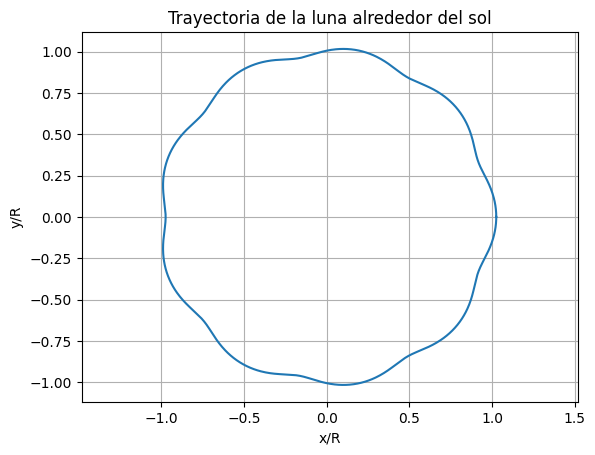

In [16]:
t = np.linspace(0, 1/alpha, 1000)

plt.plot(x(t), y(t))
plt.axis('equal')
plt.grid(True)
plt.xlabel('x/R')
plt.ylabel('y/R')
plt.title('Trayectoria de la luna alrededor del sol')
plt.show()

In [20]:
import numpy as np
import plotly.graph_objects as go

# Parámetros
alpha = 0.1  # Valor de α
r = 0.025    # r/R
t = np.linspace(0, 1/alpha, 1000)

# Funciones para x(t) y y(t)
def x(t):
    return r * np.cos(2 * np.pi * t) + np.cos(2 * np.pi * alpha * t)

def y(t):
    return r * np.sin(2 * np.pi * t) + np.sin(2 * np.pi * alpha * t)

# Coordenadas de la trayectoria
x_vals = x(t)
y_vals = y(t)

# Crear la animación con Plotly
frames = []
for i in range(len(t)):
    frame = go.Frame(
        data=[
            # Trayectoria de la Luna
            go.Scatter(x=x_vals[:i+1], y=y_vals[:i+1], mode='lines', line=dict(color='red', width=2), name='Órbita'),
            # Luna en movimiento
            go.Scatter(x=[x_vals[i]], y=[y_vals[i]], mode='markers', marker=dict(color='white', size=10, symbol='star'), name='Luna')
        ],
        name=str(i)
    )
    frames.append(frame)

# Configuración de la figura
fig = go.Figure(
    data=[
        # Trayectoria completa de la Luna
        go.Scatter(x=x_vals, y=y_vals, mode='lines', line=dict(color='red', width=2), name='Órbita completa'),
        # Luna inicial
        go.Scatter(x=[x_vals[0]], y=[y_vals[0]], mode='markers', marker=dict(color='white', size=10, symbol='star'), name='Luna')
    ],
    layout=go.Layout(
        title='Trayectoria de la Luna alrededor del Sol',
        plot_bgcolor='black',  # Fondo negro
        paper_bgcolor='black',  # Fondo del papel negro
        font=dict(color='white'),  # Texto en blanco
        xaxis=dict(
            title='x/R',
            range=[-0.035, 0.035],  # Ajuste del rango para la visualización
            scaleanchor="y",
            scaleratio=1,
            gridcolor='rgba(128, 128, 128, 0.2)',  # Rejilla gris tenue
            zerolinecolor='rgba(128, 128, 128, 0.2)'
        ),
        yaxis=dict(
            title='y/R',
            range=[-0.035, 0.035],  # Ajuste del rango para la visualización
            gridcolor='rgba(128, 128, 128, 0.2)',  # Rejilla gris tenue
            zerolinecolor='rgba(128, 128, 128, 0.2)'
        ),
        showlegend=True,
        legend=dict(
            font=dict(color='white'),
            bgcolor='rgba(0,0,0,0.5)'
        ),
        updatemenus=[
            dict(
                type='buttons',
                font=dict(color='black'),
                bgcolor='white',
                showactive=False,
                buttons=[
                    dict(label='Play',
                         method='animate',
                         args=[None, dict(frame=dict(duration=2, redraw=True),
                                          fromcurrent=True)]),
                    dict(label='Pause',
                         method='animate',
                         args=[[None], dict(frame=dict(duration=0, redraw=False),
                                            mode='immediate')])
                ]
            )
        ]
    ),
    frames=frames
)

# Guardar la animación como HTML
fig.write_html("trayectoria_luna_animada.html")
print("Animación interactiva creada y guardada como 'trayectoria_luna_animada.html'")


Animación interactiva creada y guardada como 'trayectoria_luna_animada.html'
